# **ANN REGRESSION**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from sklearn import datasets

In [10]:
boston = datasets.load_boston()

In [19]:
df = pd.DataFrame(boston.data, columns=boston.feature_names )

In [26]:
df["H_PRICE"] = boston.target

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,H_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
X = df.drop("H_PRICE", axis = 1).values
y = df["H_PRICE"].values

In [47]:
print(f"Shape of X = {X.shape}")
print(f"Shape of Y= {y.shape}")

Shape of X = (506, 13)
Shape of Y= (506,)


In [91]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [93]:
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[13]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [96]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [102]:
model_history = model.fit(X_train, y_train, epochs=20,
                          validation_data=(X_valid, y_valid))

Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 6.3216 - mae: 1.8850 - val_loss: 22.6681 - val_mae: 3.1001
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 5.8115 - mae: 1.7648 - val_loss: 23.2056 - val_mae: 3.1080
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 5.6657 - mae: 1.7499 - val_loss: 23.8366 - val_mae: 3.1135
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 5.5787 - mae: 1.7486 - val_loss: 24.0196 - val_mae: 3.1144
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 5.4562 - mae: 1.7295 - val_loss: 24.0086 - val_mae: 3.1134
Epoch 6/20
9/9 [==============================] - ETA: 0s - loss: 8.0356 - mae: 1.944 - 0s 4ms/step - loss: 5.4049 - mae: 1.7218 - val_loss: 24.0206 - val_mae: 3.1125
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 5.3633 - mae: 1.7155 - val_loss: 24.0666 - val_mae: 3.1123
Epoch 8/20
9/9 [==============================] - 0s 4ms/s

In [103]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 0s/step - loss: 13.5407 - mae: 2.1446


[13.540654182434082, 2.144587993621826]

In [104]:
model.predict(X_test[:1])

array([[24.202747]], dtype=float32)

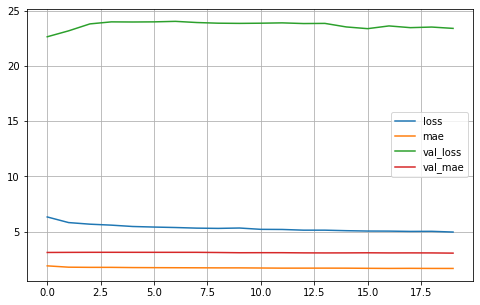

In [107]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)

plt.show()